#### Import pandas and read in the quora_questions.csv file.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("quora_questions.csv")

In [ ]:
data.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
data["Question"][0]

'What is the step by step guide to invest in share market in india?'

# Preprocessing

####  Using TF-IDF Vectorization to create a vectorized document term matrix. You may want to explore the max_df and min_df parameters.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [ ]:
dtm = tfidf.fit_transform(data['Question'])

In [ ]:
dtm

<404289x38669 sparse matrix of type '<class 'numpy.float64'>'
	with 2002912 stored elements in Compressed Sparse Row format>

# Non-negative Matrix Factorization

#### Using Scikit-Learn create an instance of NMF with 20 expected components.

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components=20, random_state=42) # the choice of 20 Topic is so Random

In [ ]:
nmf_model.fit(dtm)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=20, random_state=42)

####  Printing our the top 15 most common words for each of the 20 topics.

In [ ]:
for index, topic in enumerate(nmf_model.components_):
    print(f"The top 15 words for topic # {index}")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:] ])
    print("\n")

The top 15 words for topic # 0
['thing', 'read', 'place', 'visit', 'places', 'phone', 'buy', 'laptop', 'movie', 'ways', '2016', 'books', 'book', 'movies', 'best']


The top 15 words for topic # 1
['majors', 'recruit', 'sex', 'looking', 'differ', 'use', 'exist', 'really', 'compare', 'cost', 'long', 'feel', 'work', 'mean', 'does']


The top 15 words for topic # 2
['add', 'answered', 'needing', 'post', 'easily', 'improvement', 'delete', 'asked', 'google', 'answers', 'answer', 'ask', 'question', 'questions', 'quora']


The top 15 words for topic # 3
['using', 'website', 'investment', 'friends', 'black', 'internet', 'free', 'home', 'easy', 'youtube', 'ways', 'earn', 'online', 'make', 'money']


The top 15 words for topic # 4
['balance', 'earth', 'day', 'death', 'changed', 'live', 'want', 'change', 'moment', 'real', 'important', 'thing', 'meaning', 'purpose', 'life']


The top 15 words for topic # 5
['reservation', 'engineering', 'minister', 'president', 'company', 'china', 'business', 'coun

#### Adding a new column to the original quora dataframe that labels each question into one of the 20 topic categories.

In [ ]:
topic_results = nmf_model.transform(dtm)

In [ ]:
data['Topic'] = topic_results.argmax(axis = 1)

In [ ]:
data.head()

,Question,Topic
0,What is the step by step guide to invest in sh...,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16
2,How can I increase the speed of my internet co...,17
3,Why am I mentally very lonely? How can I solve...,11
4,"Which one dissolve in water quikly sugar, salt...",14


#### Adding labels to the Topics corrseponding to their Top 15 words

In [ ]:
topic_dictionary = {
    0: "General Interests",
    1: "Career and Comparisons",
    2: "Online Questions and Answers",
    3: "Online Earning and Website",
    4: "Life's Meaning and Purpose",
    5: "Global Affairs and Business",
    6: "Learning Programming",
    7: "US Presidential Elections",
    8: "Global Events and Conflicts",
    9: "Cultural Perspectives",
    10: "Movies, Music, and Careers",
    11: "Indian Economy and Policies",
    12: "Personal Growth and New Beginnings",
    13: "Language Fluency and Skills",
    14: "Health and Fitness",
    15: "Personal Preferences and Experiences",
    16: "Relationships and Emotions",
    17: "Hacks and Quick Solutions",
    18: "Technology and Engineering",
    19: "Earth Beliefs and Questions"
}
data['Topic'] = data['Topic'].map(topic_dictionary)

In [ ]:
data.head()

,Question,Topic
0,What is the step by step guide to invest in sh...,Global Affairs and Business
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,Relationships and Emotions
2,How can I increase the speed of my internet co...,Hacks and Quick Solutions
3,Why am I mentally very lonely? How can I solve...,Indian Economy and Policies
4,"Which one dissolve in water quikly sugar, salt...",Health and Fitness


In [ ]:
data['Question'][4]

'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?'

# Topic Classification

### Checking & Removing empty texts from the data

In [ ]:
blanks =[]
for i, question, topic in data.itertuples():
    if question.isspace():
        blanks.append(i)
len(blanks)

0

In [ ]:
data.drop(blanks,inplace=True)

### Building the model using Sklearn pipeline : `TfidfVectorizer()`  and `LinearSVC()`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X,y = data['Question'], data['Topic']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
text_clf = Pipeline([('tfidf_c', TfidfVectorizer()),('clf',LinearSVC())])

In [ ]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf_c', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
predictions = text_clf.predict(X_test)

### Evaluating the model : `confusion_matrix`, `classification_report`, `accuracy_score`

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(classification_report(y_test,predictions))

                                      precision    recall  f1-score   support

              Career and Comparisons       0.94      0.93      0.93      8593
               Cultural Perspectives       0.89      0.88      0.89      7022
         Earth Beliefs and Questions       0.88      0.90      0.89      8907
                   General Interests       0.94      0.94      0.94     10439
         Global Affairs and Business       0.90      0.89      0.89      6071
         Global Events and Conflicts       0.89      0.87      0.88      4583
           Hacks and Quick Solutions       0.91      0.92      0.91      6814
                  Health and Fitness       0.91      0.89      0.90      3954
         Indian Economy and Policies       0.92      0.91      0.91      4541
         Language Fluency and Skills       0.94      0.89      0.92      2614
                Learning Programming       0.93      0.89      0.91      2633
          Life's Meaning and Purpose       0.93      0.93      

In [ ]:
print(accuracy_score(y_test,predictions))

0.9048950011130624


In [ ]:
cm = confusion_matrix(y_test,predictions)

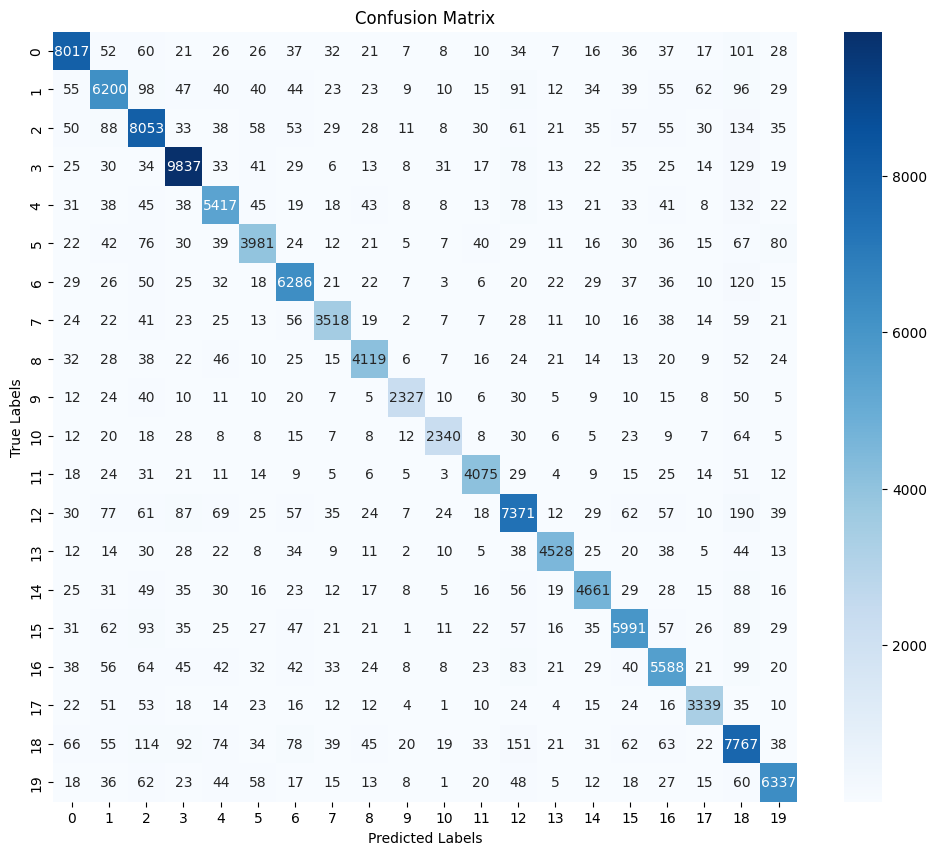

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Storing the model in a `.pkl` file to use it later in our app

In [ ]:
text = "In 2017, the new year brought a whirlwind of exciting things: blowing resolutions, new beginnings, and a sense of anticipation that had everyone's mind spinning with possibilities; even the girl who usually doesn't like change found herself eager to embrace the challenges each day held for her and her fellow employees"
text_clf.predict([text])

array(['Personal Growth and New Beginnings'], dtype=object)

In [ ]:
import pickle

In [ ]:
with open('trained_pipeline_NLP-0.1.0.pkl','wb') as f:
    pickle.dump(text_clf, f)

In [ ]:
with open(f"trained_pipeline_NLP-0.1.0.pkl", "rb") as f:
    model = pickle.load(f)

text = "In 2017, the new year brought a whirlwind of exciting things: blowing resolutions, new beginnings, and a sense of anticipation that had everyone's mind spinning with possibilities; even the girl who usually doesn't like change found herself eager to embrace the challenges each day held for her and her fellow employees"
model.predict([text])



array(['Personal Growth and New Beginnings'], dtype=object)